In [1]:
cd ../..

/Users/ericpei/Documents/GalvClas/fantasy-score-predictor


In [2]:
from scripts import MakeDF

In [3]:
from scripts import RandomForest

/Users/ericpei/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
#MakeDF.create_csvs('alldata')

In [5]:
df = MakeDF.create_df()

In [6]:
df = MakeDF.clean_df(df)

scripts/MakeDF.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['MP'] = df['MP'].map(lambda x: '0:00' if ":" not in str(x) else str(x))


In [7]:
df = MakeDF.drop_zerominutes(df)

In [8]:
df = MakeDF.add_features(df)

In [9]:
#look at this later
Player_Averages = MakeDF.make_averages(df)

In [10]:
date_matrix = MakeDF.get_date_matrix(df)

In [11]:
#MakeDF.previous_sp(9, date_matrix)

In [12]:
MakeDF.addcolumns(MakeDF.make_lists(date_matrix), df)

In [13]:
tp_matrix = df[['Player Name', '3P']].values
fg_matrix = df[['Player Name', 'FG']].values
ft_matrix = df[['Player Name', 'FT']].values
reb_matrix = df[['Player Name', 'TRB']].values
ast_matrix = df[['Player Name', 'AST']].values
blk_matrix = df[['Player Name', 'BLK']].values
stl_matrix = df[['Player Name', 'STL']].values
tov_matrix = df[['Player Name', 'TOV']].values
usg_matrix = df[['Player Name', 'USG%']].values
ftr_matrix = df[['Player Name', 'FTr']].values
pm_matrix = df[['Player Name', '+/-']].values
ts_matrix = df[['Player Name', 'TS%']].values
pf_matrix = df[['Player Name', 'PF']].values
ortg_matrix = df[['Player Name', 'ORtg']].values
drtg_matrix = df[['Player Name', 'DRtg']].values

In [14]:
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=tp_matrix, column='3P'), df, name='TP')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=fg_matrix, column='FG'), df, name='FG')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=ft_matrix, column='FT'), df, name='FT')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=reb_matrix, column='TRB'), df, name='TRB')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=ast_matrix, column='AST'), df, name='AST')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=blk_matrix, column='BLK'), df, name='BLK')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=stl_matrix, column='STL'), df, name='STL')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=tov_matrix, column='TOV'), df, name='TOV')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=usg_matrix, column='USG%'), df, name ='USGP')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=ftr_matrix, column='FTr'), df, name ='FTr')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=pm_matrix, column='+/-'), df, name ='PM')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=ts_matrix, column='TS%'), df, name ='TSP')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=pf_matrix, column='PF'), df, name ='PF')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=ortg_matrix, column='ORtg'), df, name ='ORtg')
MakeDF.add_slag_columns(MakeDF.make_stat_lists(Player_Averages, matrix=drtg_matrix, column='DRtg'), df, name ='DRtg')

In [15]:
from scripts import ElevationFlight

In [16]:
Elevation_Lookup = ElevationFlight.read_to_dict()

In [17]:
ElevationFlight.lookup_and_add(Elevation_Lookup, df)

# PLAY HERE

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
from sklearn.ensemble import RandomForestRegressor

### Make a testing Set

In [20]:
forest_df, y_df = RandomForest.date_with_forest(df, 140, remove_date=True)

In [21]:
test_df, testy_df = RandomForest.date_with_forest(df, remove_date=False)

In [22]:
import datetime

In [23]:
today = datetime.date.today()
stop_average_date = today - datetime.timedelta(140)

In [24]:
test_df = test_df[test_df['Date'] > stop_average_date]
testy_df = testy_df[testy_df['Date'] > stop_average_date]

In [25]:
test_df = test_df.ix[:,test_df.columns != 'Date']
testy_df = testy_df.ix[:, testy_df.columns != 'Date']

In [26]:
#forest_df, y_df = RandomForest.prepare_for_forest(df)

In [27]:
TestSubject = 'Stephen Curry'

In [28]:
Stephcurry, Stephcurryafter_X, Stephcurryafter_y = RandomForest.individual_forest_df(test_df, testy_df, TestSubject)

In [29]:
Stephcurry, Stephcurry_X, Stephcurry_y = RandomForest.individual_forest_df(forest_df, y_df, TestSubject)

In [30]:
X_train, X_test, y_train, y_test = RandomForest.crossval_player(Stephcurry, forest_df[forest_df["Player Name"] != TestSubject], y_df[y_df['Player Name'] != TestSubject], cat=2)
X_trainA, X_testA, y_trainA, y_testA = RandomForest.crossval_player(Stephcurry, test_df, testy_df, cat=2)
X_trainS, X_testS, y_trainS, y_testS = RandomForest.crossval_player(Stephcurry, Stephcurry_X, Stephcurry_y, cat=2)
X_trainSA, X_testSA, y_trainSA, y_testSA = RandomForest.crossval_player(Stephcurry, Stephcurryafter_X, Stephcurryafter_y, cat = 2)

scripts/RandomForest.py:72: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  X_train, X_test, y_train, y_test = train_test_split(player_x[list(player_x.columns-['Player Name'])], player_y.iloc[:,cat], test_size = 0.25, random_state = 30)


###### X Train is the df without Curry
###### X Train2 is the df with just Curry
###### S = Curry A is after cutoff

In [31]:
X_trainfull = pd.concat([X_train, X_trainS, X_trainS, X_trainSA])
y_trainfull = pd.concat([y_train, y_trainS, y_trainS, y_trainSA])

Now X Train2 is just Curry, while X Train is everyone including Curry

In [32]:
everyFGmean = pd.concat([y_train, y_trainS]).mean()
stephFGmean = y_trainS.mean()

In [33]:
len(X_test), len(X_testSA)

(63155, 14)

In [34]:
benchmark = np.full(len(X_testA)+len(X_testSA), everyFGmean)
s_benchmark = np.full(len(X_testSA), stephFGmean)

In [35]:
rf = RandomForestRegressor()
rf2 = RandomForestRegressor()

In [36]:
rf.fit(X_trainfull, y_trainfull)
rf2.fit(X_trainS, y_trainS)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [38]:
y_predict = rf.predict(X_testA)
y_predict = np.append(y_predict, rf.predict(X_testSA))# + rf.predict(X_test2)
y_predictS = rf2.predict(X_testSA)

### MSE of Everyone model on everyone. MSE of my StephCurry Model on himself

In [39]:
mean_squared_error(np.append(y_testA,y_testSA), y_predict), mean_squared_error(y_testSA, y_predictS)

(5.5466193302246714, 15.542142857142858)

## How do we do against the benchmark?

In [40]:
mean_squared_error(np.append(y_testA,y_testSA), benchmark), mean_squared_error(y_testSA, s_benchmark)

(8.704328375020367, 19.618748943364324)

#### We have a lower MSE than average on all players
#### Lower MSE on Curry compared to his own average

In [41]:
y_predict3 = rf.predict(X_testSA)
mean_squared_error(y_testSA, y_predict3)

16.037142857142857

# PCA

In [42]:
#from sklearn.decomposition import PCA

In [43]:
#bad_columns = ['Player Name', 'Away', 'Home', 'OneisHome', 'Date', 'DateM1', 'DateM2', 'DateM3', 'DateM4']

In [44]:
# cols_to_use = [x for x in df_green.columns if x not in bad_columns]
# df_to_use = df_green[cols_to_use]

In [45]:
# cols_to_use = [x for x in Stephcurry_X.columns if x not in bad_columns]
#df_to_use = Stephcurry_y[['FG','3P','FT','TRB', 'AST', 'STL', 'BLK', 'TOV']]

In [46]:
#feed_to_pca = df_to_use.iloc[:,:34]

In [47]:
#feed_to_pca['Elevation'] = df_to_use['Elevation']

In [48]:
#bad_columns2 = ['FG%', '3P%', 'FT%', 'TRB', '3PAr', 'FTr']

In [49]:
# cols_to_use = [x for x in feed_to_pca.columns if x not in bad_columns2]
# pca_nomnom = feed_to_pca[cols_to_use]

In [50]:
#from scripts import PCA_ready

In [51]:
#pca_nomnom = df_to_use[['3P','FG','FT','TRB', 'AST', 'STL', 'BLK', 'TOV']]

In [52]:
#threecomp, vectors = PCA_ready.run_pca(df_to_use)

In [53]:
#PA = MakeDF.make_averages(df, cutoff=140)

In [54]:
#PA

In [55]:
#PA.head()

In [56]:
#pca_lst = PCA_ready.get_lst_pca(df)

In [57]:
#pca_lst

In [58]:
#end = PCA_ready.kmeanscluster_ready(pca_lst, PA)

In [59]:
#estimators = {'k_means_player_5': KMeans(n_clusters=5, random_state = 30),
#               'k_means_player_9': KMeans(n_clusters=9, random_state = 30),
#               'k_means_player_13': KMeans(n_clusters=13, random_state = 30),
#               'k_means_player_bad_init': KMeans(n_clusters=5, n_init=1,
#                                               init='random', random_state = 30)}

In [60]:
#km = KMeans(n_clusters=10, random_state = 30)

In [61]:
#km.fit(end)

In [62]:
#PA.index.values

In [63]:
#dc = PCA_ready.make_cluster_dictionary(km, PA)

In [64]:
#dc2 = PCA_ready.make_cluster_dictionary2(km, PA)

# Averages Per Min

In [65]:
from scripts import PCA_ready

In [66]:
PA = MakeDF.make_averages(df)

In [67]:
PA48 = MakeDF.make_averages_per48(PA)

In [68]:
mat, comp = PCA_ready.run_pca(PA48.iloc[:,:8])

In [69]:
from sklearn.cluster import KMeans

In [70]:
km = KMeans(n_clusters=5, random_state = 30)
#km = KMeans(n_clusters=10, random_state = 30)


In [71]:
import matplotlib.pyplot as plt

In [72]:
%matplotlib inline

([array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,   20.,  232.,  326.,  224.,  222.,  130.,   30.,    4.,
            1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            1.,    0.,    1.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    7.,    4.,
            6.,   33.,  136.,  335.,  329.,  210.,   76.,   32.,   15.,
            5.,    1.,    0.,    1.,    0.,    1.,    0.,    0.,    0.,
            0.,    0.,    0.]),
  array([   1.,    0.,    1.,    0.,    0.,    0.,    0.,    1.,   10.,
           16.,   50.,  112.,  246.,  371.,  275.,   87.,   16.,    2.,
            0.,    0.,    1.,    1.,    1.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.])],
 array([ -8.60936037,  -7.96244518,  -7.31553   ,  -6.66861481,
         -6.02169962,  -5.37478443,  -4.72786925,  -4.08095406,
         -3.43403887,  -2.78712368,  -2.1402085 ,  -1.49329331,
         -0.84637812,  -0.19946294,   0.44745225,   1.09436744,

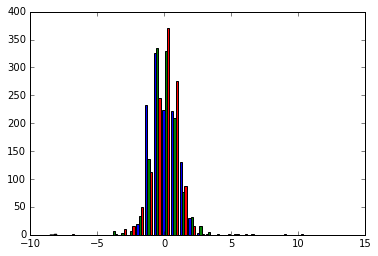

In [73]:
plt.hist(mat, bins=30)

In [74]:
km.fit(mat)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

In [75]:
dict_pca2 = PCA_ready.make_cluster_dictionary2(km, PA48)

In [76]:
dict_pca2

defaultdict(list,
            {0: ['Aaron Harrison',
              'Aaron McKie',
              'Adam Morrison',
              'Adonis Thomas',
              'Alan Anderson',
              'Alex Acker',
              'Alex Kirk',
              'Alex Scales',
              'Allan Ray',
              'Allen Crabbe',
              'Alonzo Gee',
              'Andre Dawkins',
              'Andre Emmett',
              'Andre Owens',
              'Andre Roberson',
              'Andreas Glyniadakis',
              'Andrew Goudelock',
              'Andy Rautins',
              'Anfernee Hardaway',
              'Anthony Brown',
              'Anthony Goldwire',
              'Anthony Morrow',
              'Anthony Parker',
              'Anthony Roberson',
              'Anthony Tolliver',
              'Antoine Wright',
              'Antonio Anderson',
              'Arron Afflalo',
              'Arvydas Macijauskas',
              'Austin Daye',
              'Austin Rivers',
       

# Try with original 8

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
standard_scaler = StandardScaler()

In [79]:
scaled = standard_scaler.fit_transform(PA48.iloc[:,:8])

In [80]:
km.fit(scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

In [81]:
dict_nonpca = PCA_ready.make_cluster_dictionary2(km, PA48.iloc[:,:8])

In [82]:
dict_nonpca

defaultdict(list,
            {0: ['Aaron Miles',
              'Acie Law',
              'Alexey Shved',
              'Alvin Williams',
              'Andre Barrett',
              'Andy Rautins',
              'Anfernee Hardaway',
              'Anthony Carter',
              'Anthony Johnson',
              'Antonio Burks',
              'Antonio Daniels',
              'Armon Johnson',
              'Arvydas Macijauskas',
              'Ben Hansbrough',
              'Ben Uzoh',
              'Beno Udrih',
              'Bernard Robinson',
              'Boris Diaw',
              'Brevin Knight',
              'Briante Weber',
              'Bryon Russell',
              'C.J. Watson',
              'Cameron Payne',
              'Carldell Johnson',
              'Carlos Arroyo',
              'Cedric Jackson',
              'Charles Jenkins',
              'Chris Duhon',
              'Chris Quinn',
              'Coby Karl',
              'Corey Brewer',
              'Cory Jos

# 3D Plot on PCA

In [83]:
from mpl_toolkits.mplot3d import Axes3D

In [84]:
from scripts import makeplot

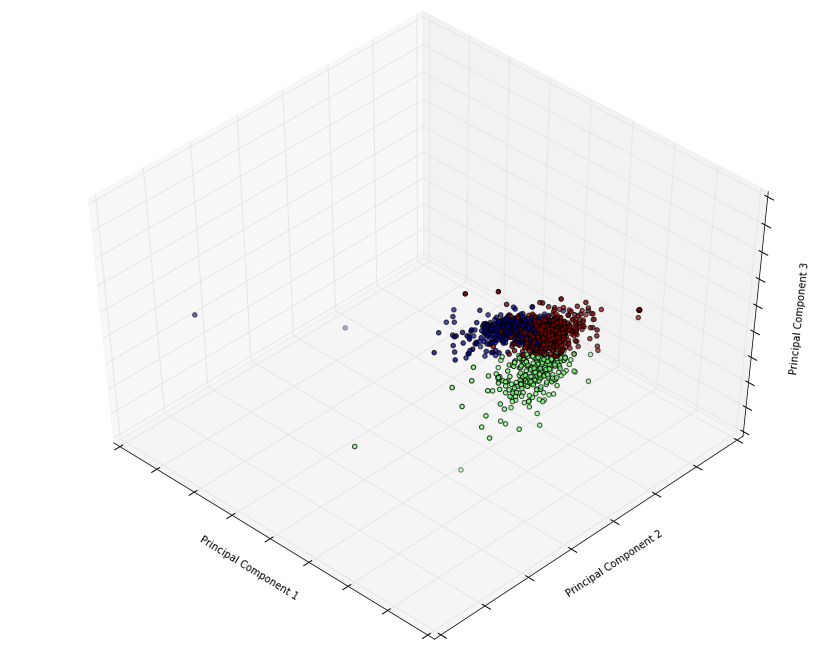

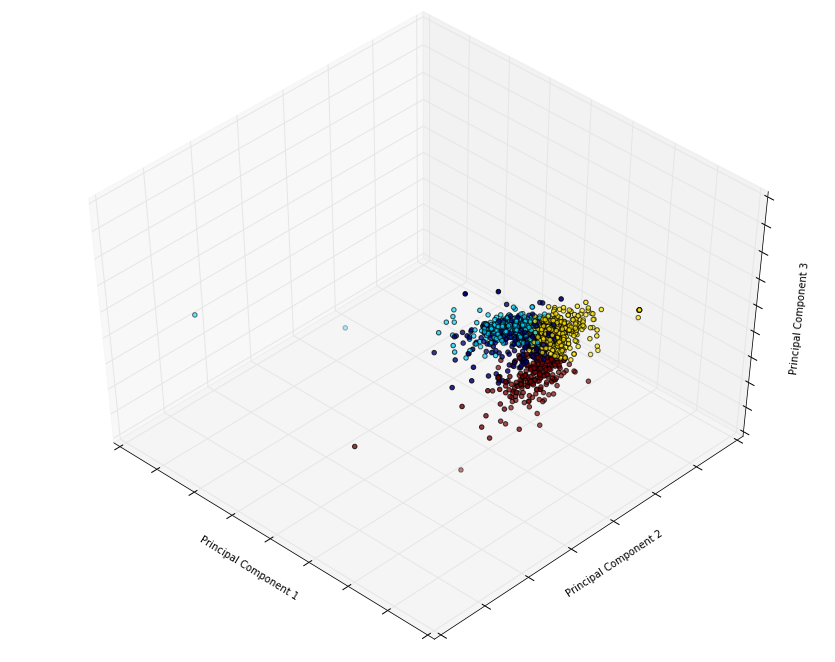

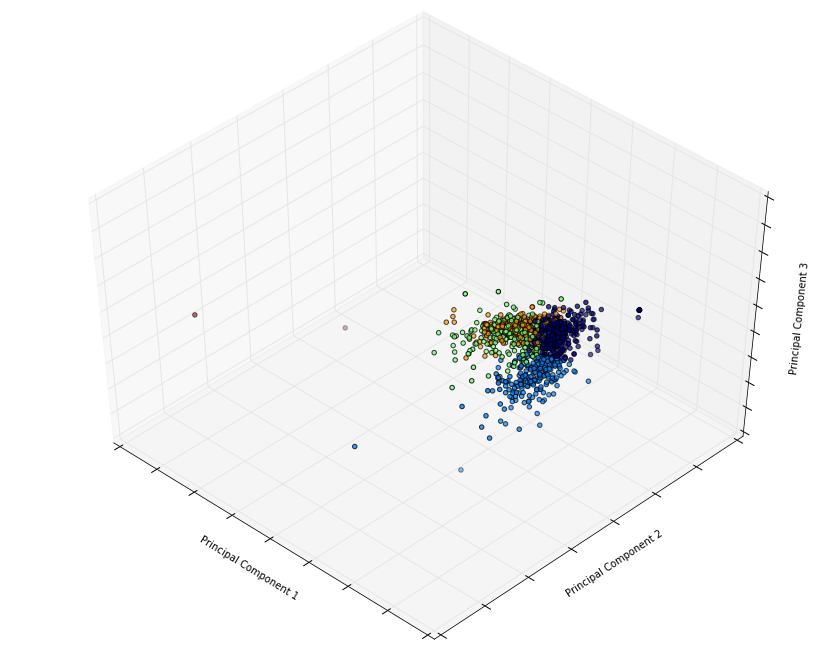

In [85]:
makeplot.make_plots(mat)

In [86]:
mat.sort_values(by=0, ascending=False).head()

,0,1,2
1061,10.798095,5.537302,-1.688345
550,9.211868,0.227202,-6.783831
670,3.283463,0.509976,0.054202
21,2.901415,1.201833,0.149747
436,2.746432,1.046419,0.552468


In [87]:
PA48.index[1061]

'Steven Hill'

#### Points 147, 550, 1039, 1061, 1084 are problematic

# Find outliers that are messing up PCA

### Drop them from PCA

In [88]:
PA48_nout = PA48.drop(PA48.index[[147,550,1039,1061,1084]])

In [89]:
mat_nout, comp_nout = PCA_ready.run_pca(PA48_nout.iloc[:,:8])

In [90]:
km = KMeans(n_clusters=5, random_state = 30)

In [91]:
km.fit(mat_nout)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

In [92]:
dict_pca2_nout = PCA_ready.make_cluster_dictionary2(km, PA48_nout.iloc[:,:8])

In [93]:
dict_pca2_nout

defaultdict(list,
            {0: ['Aaron Harrison',
              'Aaron McKie',
              'Alex Kirk',
              'Alex Scales',
              'Alonzo Gee',
              'Andre Dawkins',
              'Andre Emmett',
              'Andre Owens',
              'Andre Roberson',
              'Andreas Glyniadakis',
              'Anfernee Hardaway',
              'Anthony Brown',
              'Anthony Goldwire',
              'Anthony Parker',
              'Anthony Tolliver',
              'Antoine Wright',
              'Antonio Anderson',
              'Axel Toupane',
              'Bernard Robinson',
              'Billy Thomas',
              'Branden Dawson',
              'Brandon Rush',
              'Brent Barry',
              'Brian Cardinal',
              'Brian Scalabrine',
              'Bruce Bowen',
              'Bruno Caboclo',
              'Bryce Dejean-Jones',
              'Calbert Cheaney',
              'Casey Jacobsen',
              'Cedric Bozeman',

# Regraph

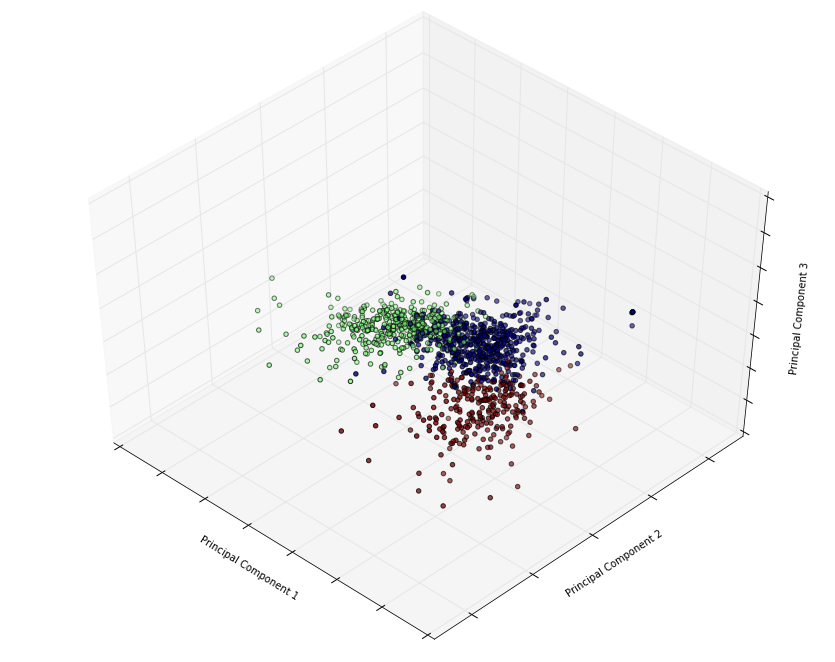

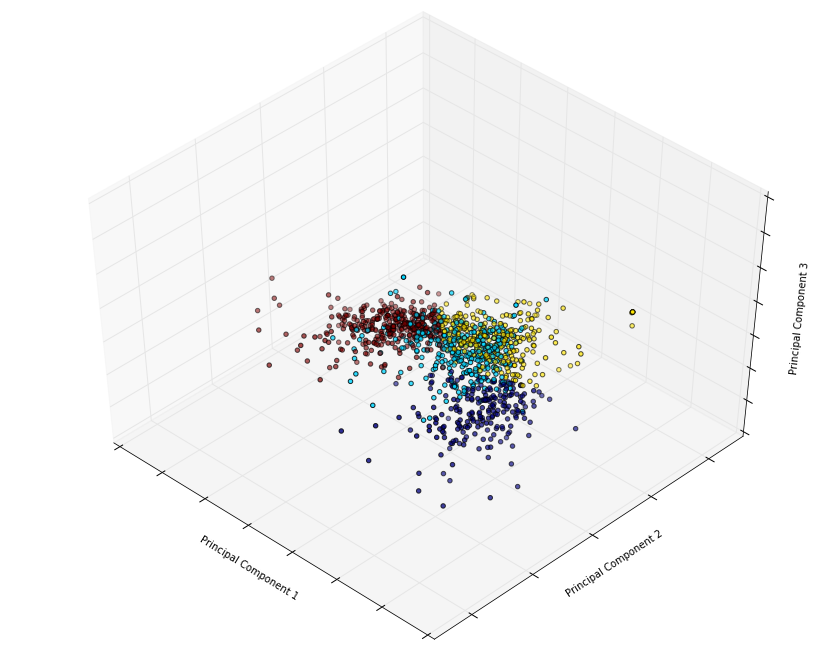

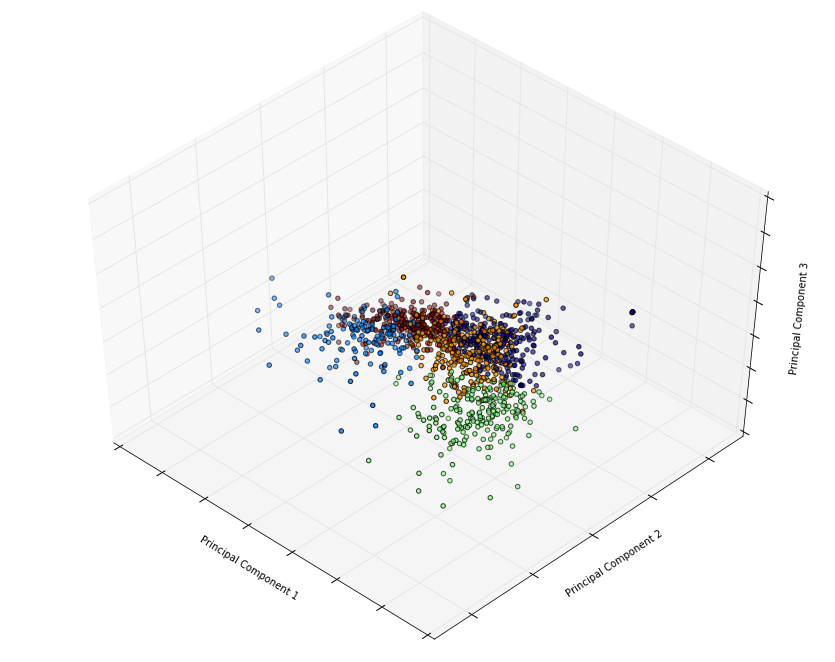

In [94]:
makeplot.make_plots(mat_nout)

# Silhouette Score Benchmark

In [95]:
from scripts import makesilplot

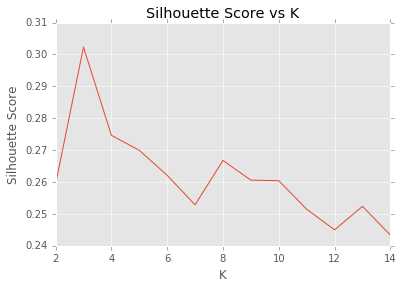

In [96]:
makesilplot.plot_silhouette(mat_nout, 15)

('For n_clusters =', 3, 'The average silhouette_score is :', 0.30231034565980669)


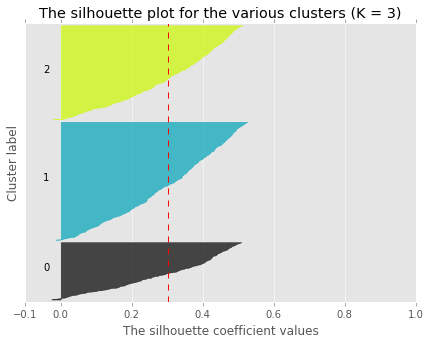

In [97]:
makesilplot.cluster_plot(mat_nout, 3)

('For n_clusters =', 4, 'The average silhouette_score is :', 0.27483420275869386)


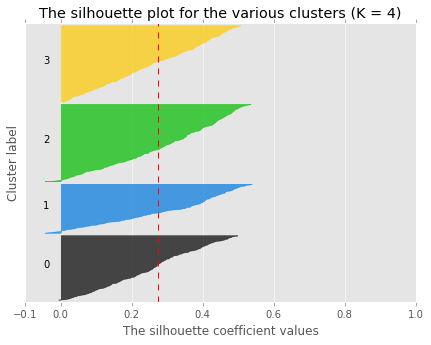

In [98]:
makesilplot.cluster_plot(mat_nout, 4)

##### data suggest not really clusterable

In [99]:
km = KMeans(n_clusters=3, random_state = 30)

In [100]:
km.fit(mat_nout)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

##### lets look at the actual clusters

In [101]:
dict_pca4_nout = PCA_ready.make_cluster_dictionary2(km, PA48_nout)
dict_pca4_nout[2]

['A.J. Price',
 'Aaron Brooks',
 'Aaron McKie',
 'Aaron Miles',
 'Acie Law',
 'Alexey Shved',
 'Allen Iverson',
 'Alvin Williams',
 'Andre Barrett',
 'Andre Iguodala',
 'Andre Miller',
 'Andrei Kirilenko',
 'Anfernee Hardaway',
 'Anthony Carter',
 'Anthony Johnson',
 'Antonio Burks',
 'Antonio Daniels',
 'Armon Johnson',
 'Baron Davis',
 'Ben Hansbrough',
 'Ben Uzoh',
 'Beno Udrih',
 'Bobby Brown',
 'Boris Diaw',
 'Brandon Jennings',
 'Brandon Knight',
 'Brandon Roy',
 'Brevin Knight',
 'Brian Roberts',
 'Briante Weber',
 'C.J. Watson',
 'Cameron Payne',
 'Carldell Johnson',
 'Carlos Arroyo',
 'Cedric Jackson',
 'Charles Jenkins',
 'Chauncey Billups',
 'Chris Duhon',
 'Chris Paul',
 'Chris Quinn',
 'Chucky Atkins',
 'Coby Karl',
 'Cory Joseph',
 'Courtney Fortson',
 "D'Angelo Russell",
 'D.J. Augustin',
 'D.J. Strawberry',
 'Damian Lillard',
 'Damon Stoudamire',
 'Dan Dickau',
 'Darington Hobson',
 'Darius Morris',
 'Darrell Armstrong',
 'Darren Collison',
 'Darrick Martin',
 'David St

#### despite silhouette scores indicating clusters not optimal, clusters seem to make sense. This cluster has a very high density of guards. Steph Curry, Chris Paul, Steve Nash, Russell Westbrook, Tony Parker, Jeremy Lin.

# Start aggregating players

In [102]:
clusteroneX, clusteroney = RandomForest.date_with_forest(df, remove_date=False)

In [103]:
one_x = clusteroneX[clusteroneX['Player Name'].isin(dict_pca4_nout[2])]
one_y = clusteroney[clusteroney['Player Name'].isin(dict_pca4_nout[2])]

In [104]:
curryleftx = one_x[one_x['Player Name'] != 'Stephen Curry']
currylefty = one_y[one_y['Player Name'] != 'Stephen Curry']

In [105]:
onlycurryx = one_x[one_x['Player Name'] == 'Stephen Curry']
onlycurryy = one_y[one_y['Player Name'] == 'Stephen Curry']

In [106]:
today = datetime.date.today()
stop_average_date = today - datetime.timedelta(140)

In [107]:
aftercurryx = onlycurryx[onlycurryx['Date'] > stop_average_date]
aftercurryy = onlycurryy[onlycurryy['Date'] > stop_average_date]

In [108]:
beforecurryx = onlycurryx[onlycurryx['Date'] <= stop_average_date]
beforecurryy = onlycurryy[onlycurryy['Date'] <= stop_average_date]

In [109]:
from sklearn.cross_validation import train_test_split

In [110]:
aftercurryx_train, aftercurryx_test, aftercurryy_train, aftercurryy_test = train_test_split(aftercurryx[list(aftercurryx.columns-['Player Name','Date'])], aftercurryy.iloc[:,3], test_size = 0.25, random_state = 30)

/Users/ericpei/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


In [111]:
ClusterOne_xtrain = pd.concat([curryleftx, beforecurryx])
ClusterOne_ytrain = pd.concat([currylefty['FG'], beforecurryy['FG']])
ClusterOne_StephAvg = pd.concat([beforecurryy['FG'], aftercurryy_train]).mean()
#ClusterOne_ytrain = ClusterOne_ytrain.append(aftercurryy_train)

In [112]:
ClusterOne_xtrain = ClusterOne_xtrain.drop('Date', axis=1)

In [113]:
ClusterOne_rf = RandomForestRegressor()

In [114]:
ClusterOne_rf.fit(ClusterOne_xtrain.ix[:, ClusterOne_xtrain.columns != 'Player Name'], ClusterOne_ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [115]:
clustcurrypredictions = ClusterOne_rf.predict(aftercurryx_test)

In [116]:
mean_squared_error(clustcurrypredictions, aftercurryy_test)

14.938571428571427

In [117]:
#PA.loc['Stephen Curry', 'FG']

In [118]:
stephavg = np.empty(len(clustcurrypredictions))

In [119]:
ClusterOne_StephAvg

7.7857142857142856

In [120]:
stephavg.fill(ClusterOne_StephAvg)

In [121]:
mean_squared_error(stephavg, aftercurryy_test)

18.576530612244898

In [122]:
clustcurrypredictions

array([  8.2,   8.6,   8.9,  11.4,  10.8,   9.8,   9. ,   8.5,   8.7,
         8.3,   9.5,   8.4,   9.2,   9.1])

In [123]:
aftercurryy_test

241850    13
241862    12
241882     9
241855     4
241879    12
241856     9
241865    14
241864    14
241841     7
241851    12
241875    12
241860    12
241867    14
241853    11
Name: FG, dtype: int64

# Cluster Two

In [221]:
from scripts import RandomForest

In [325]:
from scripts import clusters

In [247]:
PA140 = MakeDF.make_averages(df, cutoff=140)

In [326]:
cluster2predictions, true_2_y = clusters.something(df, cluster_dict=dict_pca4_nout, cluster_num=2, cutoff=140)

In [327]:
true_2y_score = 2*true_2_y['FG'] + true_2_y['3P'] + true_2_y['FT'] + 1.2*true_2_y['TRB'] + 1.5*true_2_y['AST']\
                + 2*true_2_y['BLK'] + 2*true_2_y['STL'] - true_2_y['TOV']

In [328]:
mean_squared_error(true_2y_score, cluster2predictions['SCR'])

95.471761080958842

(-10, 75)

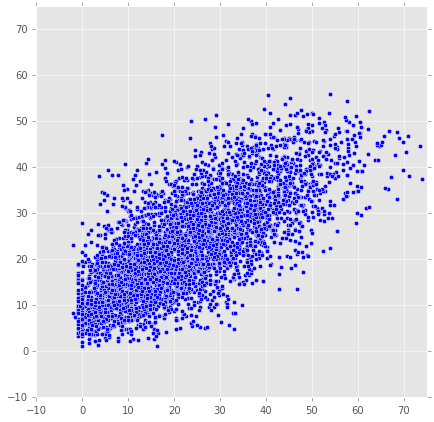

In [329]:
plt.figure(figsize=(7,7))
plt.scatter(true_2y_score, cluster2predictions['SCR'])
plt.xlim(-10,75)
plt.ylim(-10,75)

In [269]:
from scipy import stats

In [330]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_2y_score, cluster2predictions['SCR'])
print "r-squared:", r_value**2

r-squared: 0.534722372813


In [259]:
afterone_y['SCRavg'] = afterone_y['Player Name'].apply(lambda x: PA140.ix[x, 'Score'] if x in PA140.index else 0)

/Users/ericpei/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [263]:
mean_squared_error(clusterone_score, afterone_y['SCRavg'])

143.78922608224673

(-10, 75)

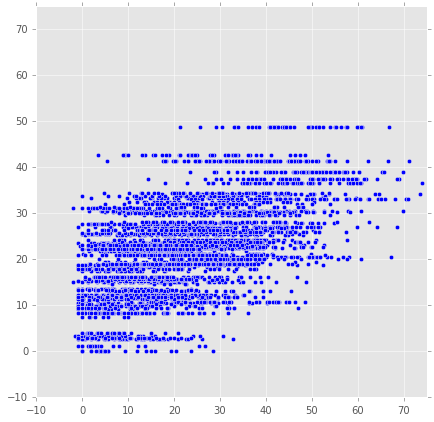

In [331]:
plt.figure(figsize=(7,7))
plt.scatter(clusterone_score, afterone_y['SCRavg'])
plt.xlim(-10,75)
plt.ylim(-10,75)

In [272]:
slope, intercept, r_value, p_value, std_err = stats.linregress(clusterone_score, afterone_y['SCRavg'])

In [273]:
print "r-squared:", r_value**2

r-squared: 0.311653002992


# Cluster One

In [297]:
from scripts import clusters

In [298]:
cluster1predictions, true_y = clusters.something(df, cluster_dict=dict_pca4_nout, cluster_num=1, cutoff=140)

In [303]:
true_y_score = 2*true_y['FG'] + true_y['3P'] + true_y['FT'] + 1.2*true_y['TRB'] + 1.5*true_y['AST']\
                + 2*true_y['BLK'] + 2*true_y['STL'] - true_y['TOV']

In [306]:
mean_squared_error(true_y_score, cluster1predictions['SCR'])

96.343283148591965

(-10, 75)

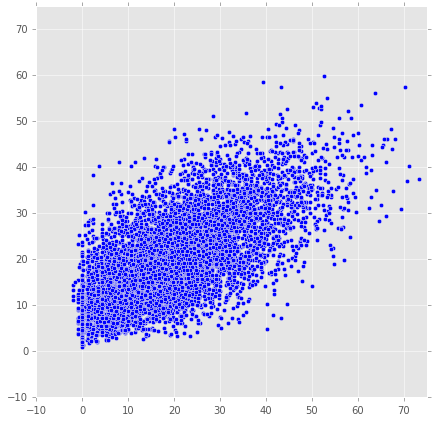

In [316]:
plt.figure(figsize=(7,7))
plt.scatter(true_y_score, cluster1predictions['SCR'])
plt.xlim(-10,75)
plt.ylim(-10,75)

In [305]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_y_score, cluster1predictions['SCR'])
print "r-squared:", r_value**2

r-squared: 0.462749102229


In [313]:
true_y['SCRavg'] = true_y['Player Name'].apply(lambda x: PA140.ix[x, 'Score'] if x in PA140.index else 0)

In [314]:
mean_squared_error(true_y_score, true_y['SCRavg'])

124.71182555339429

(-10, 75)

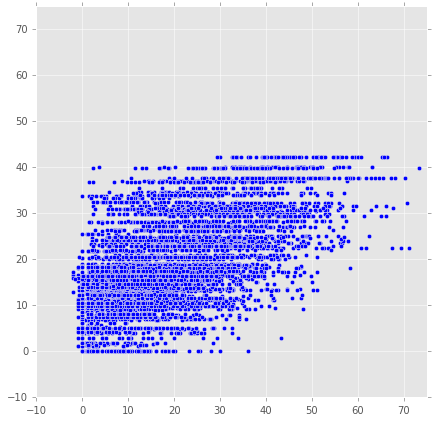

In [317]:
plt.figure(figsize=(7,7))
plt.scatter(true_y_score, true_y['SCRavg'])
plt.xlim(-10,75)
plt.ylim(-10,75)

In [318]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_y_score, true_y['SCRavg'])
print "r-squared:", r_value**2

r-squared: 0.31911003189


# Cluster 0

In [307]:
cluster0predictions, true_0_y = clusters.something(df, cluster_dict=dict_pca4_nout, cluster_num=0, cutoff=140)

In [308]:
true_0y_score = 2*true_0_y['FG'] + true_0_y['3P'] + true_0_y['FT'] + 1.2*true_0_y['TRB'] + 1.5*true_0_y['AST']\
                + 2*true_0_y['BLK'] + 2*true_0_y['STL'] - true_0_y['TOV']

In [309]:
mean_squared_error(true_0y_score, cluster0predictions['SCR'])

74.949112679891101

(-10, 75)

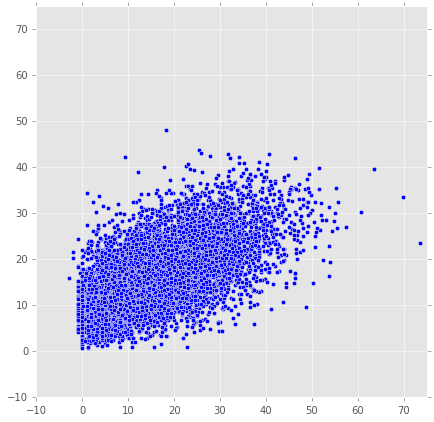

In [322]:
plt.figure(figsize=(7,7))
plt.scatter(true_0y_score, cluster0predictions['SCR'])
plt.xlim(-10,75)
plt.ylim(-10,75)

In [312]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_0y_score, cluster0predictions['SCR'])
print "r-squared:", r_value**2

r-squared: 0.382746454713


In [319]:
true_0_y['SCRavg'] = true_0_y['Player Name'].apply(lambda x: PA140.ix[x, 'Score'] if x in PA140.index else 0)

In [321]:
mean_squared_error(true_0y_score, true_0_y['SCRavg'])

104.6719949043551

(-10, 75)

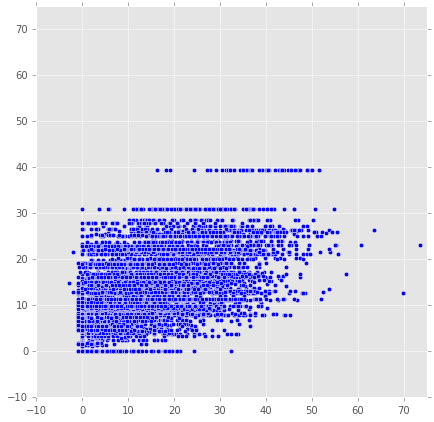

In [323]:
plt.figure(figsize=(7,7))
plt.scatter(true_0y_score, true_0_y['SCRavg'])
plt.xlim(-10,75)
plt.ylim(-10,75)

In [324]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_0y_score, true_0_y['SCRavg'])
print "r-squared:", r_value**2

r-squared: 0.177172421478


# Individual Model

In [143]:
sc, scx, scy = RandomForest.individual_forest_df(forest_df, y_df, 'Stephen Curry')

In [144]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

In [145]:
fy, ydf = RandomForest.date_with_forest(df,cutoff=120)

In [146]:
curry_X = fy[fy['Player Name'] == 'Stephen Curry']
curry_y = ydf[ydf['Player Name'] == 'Stephen Curry']

In [147]:
scurryX_train, scurryX_test, scurryy_train, scurryy_test = train_test_split(curry_X[curry_X.columns-['Player Name']], curry_y.iloc[:,1], test_size = 0.25, random_state = 30)

/Users/ericpei/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


In [148]:
dictio = {}

In [149]:
dictio['XYZ'] = RandomForestRegressor()

In [150]:
dictio['XYZ'].fit(X_test,y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [151]:
scurryX_test

,AST1dayago,AST2dayago,AST3dayago,AST4dayago,BLK1dayago,BLK2dayago,BLK3dayago,BLK4dayago,DRtg1dayago,DRtg2dayago,...,TRB3dayago,TRB4dayago,TSP1dayago,TSP2dayago,TSP3dayago,TSP4dayago,USGP1dayago,USGP2dayago,USGP3dayago,USGP4dayago
241544,9,5,4,8,0,0,1,0,127,105,...,5,3,0.208,0.707,0.406,0.757,31.0,27.0,25.9,22.5
241677,11,7,9,10,0,0,0,0,94,102,...,2,4,0.674,0.687,0.594,0.649,30.7,27.5,23.6,33.0
241610,4,5,8,9,0,0,0,2,107,134,...,6,4,0.535,0.437,0.873,0.793,33.0,22.4,21.3,26.6
241463,6,9,10,3,1,0,1,0,121,123,...,6,5,0.450,0.729,0.769,0.486,20.0,25.5,24.3,27.1
241650,10,5,15,9,1,0,0,0,91,112,...,1,3,0.517,0.553,0.551,0.635,28.2,27.0,22.2,23.6
241601,3,11,3,7,0,0,0,0,116,89,...,3,3,0.468,0.422,0.555,0.450,18.1,29.6,24.2,18.2
241522,8,13,2,2,0,0,0,0,111,106,...,2,1,1.287,0.624,0.667,0.658,17.1,21.1,23.0,19.0
241589,3,4,9,6,0,0,0,0,116,113,...,6,2,0.600,0.718,0.610,0.647,16.5,22.8,29.0,27.5
241816,3,9,6,7,1,0,0,0,68,109,...,7,6,0.805,0.832,0.746,0.688,32.9,41.7,27.8,33.3
241644,10,8,3,3,0,0,0,0,107,98,...,4,7,0.462,0.886,0.541,0.723,29.7,32.7,31.9,37.2
